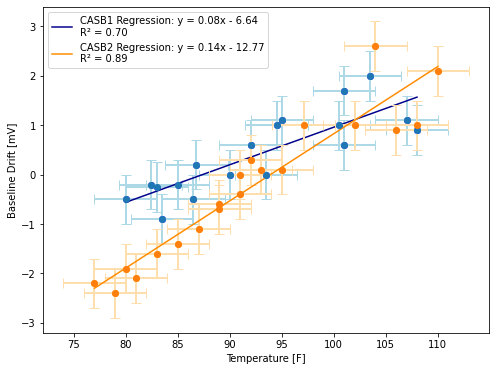

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# CASB1
x1 = np.array([78.5, 81.5, 98.5, 95.5, 75.0, 78.0, 85.0, 89.5, 96.0, 90.0, 81.8, 77.4, 88.5, 96.0, 102.0, 103.0, 87.0, 80.0])
y1 = np.array([-0.9, -0.5,    2,    1,  -0.5, -0.25,    0,  1.0,  1.7,  1.1,  0.2, -0.2,    0,  0.6,   1.1,   0.9,  0.6, -0.2])

# should have measured on chip instead of on board
for i in range(len(x1)):
    x1[i] = x1[i] + 5 

# CASB2
x2 = np.array([91,110,108,106,102,92,89,83,80,77,])
y2 = np.array([90.2,92.3,91.2,91.1,91.2,90.5,89.6,88.6,88.3,88])

x3 = np.array([91,104,97.1,95,93,89,87,85,81,79])
y3 = np.array([90.2,93.2,91.6,90.7,90.7,89.9,89.5,89.2,88.5,88.2])




def relative_voltage(voltages,zero_voltage):
    for i in range(len(voltages)):
        voltages[i] = voltages[i] - zero_voltage
    return voltages

y2 = relative_voltage(y2,90.2)
y3 = relative_voltage(y3,90.6)
y4=np.array([])
x4=np.array([])
for i in range(max(len(y2),len(y3))):
    if i < len(y2):
        y4=np.append(y4,y2[i])
        x4=np.append(x4,x2[i])
    if i < len(y3):
        y4=np.append(y4,y3[i])
        x4=np.append(x4,x3[i])


x_err_1 = np.full(len(x1),3)
y_err_1 = np.full(len(x1),0.5)
x_err_2 = np.full(len(x4),3)
y_err_2 = np.full(len(x4),0.5)

def regression(x,y):
    x_reshaped = x.reshape(-1, 1)
    model = LinearRegression()
    model.fit(x_reshaped, y)
    slope = model.coef_[0]
    intercept = model.intercept_
    y_fit = model.predict(x_reshaped)
    x_range = np.linspace(min(x), max(x), 500).reshape(-1, 1)
    y_fit_range = model.predict(x_range)
    r2 = r2_score(y, y_fit)
    return x_range, y_fit_range, slope, intercept, r2

x_range_1, y_fit_range_1, slope_1, intercept_1, r2_1 = regression(x1, y1)
x_range_4, y_fit_range_4, slope_4, intercept_4, r2_4 = regression(x4, y4)

figure = plt.figure(figsize=(8,6))

plt.scatter(x1, y1, color='blue')
plt.errorbar(x1, y1, xerr=x_err_1, yerr=y_err_1, fmt='o', ecolor='lightblue', capsize=5, elinewidth=2)
plt.plot(x_range_1, y_fit_range_1, color='darkblue', label=f'CASB1 Regression: y = {slope_1:.2f}x - {-intercept_1:.2f}\nR² = {r2_1:.2f}')

plt.scatter(x4, y4, color='orange')
plt.errorbar(x4, y4, xerr=x_err_2, yerr=y_err_2, fmt='o', ecolor='navajowhite', capsize=5, elinewidth=2)
plt.plot(x_range_4, y_fit_range_4, color='darkorange', label=f'CASB2 Regression: y = {slope_4:.2f}x - {-intercept_4:.2f}\nR² = {r2_4:.2f}')

plt.xlabel('Temperature [F]')
plt.ylabel('Baseline Drift [mV]')
plt.legend()

# Show the plot
plt.show()
